In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Now, when we train any algorithm, the number of features and their correlation plays an important role.If there  
are features and many of the features are highly correlated, then training an algorithm with all the features will reduce  
the accuracy. Thus features selection should be done carefully. This dataset has less features but still we will see    
the correlation.

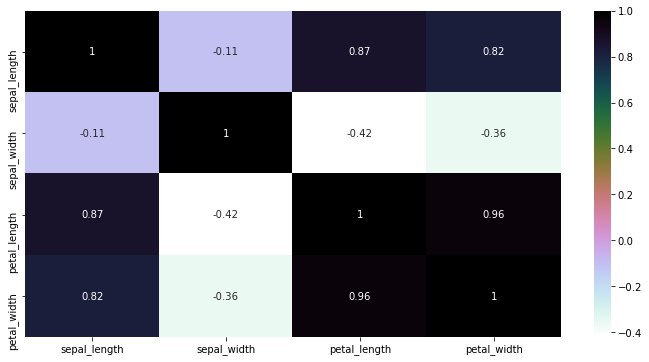

In [4]:
plt.figure(figsize=(12,6))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r', )
plt.show()

## Observations:    
The sepal width and length are not correlated. The petal width and length are highly correlated.  
We will use all the features for training the algorithm and check the accuracy.  
   
Then we will be using one petal feature and one sepal feature to check the accuracy of the algorithm as we are using only   
2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy.    

Split the dataset into training and testing dataset.   



#### Splitting the dataset into Training and testing Dataset:

In [5]:
# Installing all the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics # for checking the model accuracy

from sklearn.tree import DecisionTreeClassifier 

In [6]:
# our main data split into train and test 
# test_size=0.3 splits the data into 70% and 30% ratio. train=70% & test

train, test = train_test_split(iris, test_size=0.3, random_state=101)
print("train dataset shape--", train.shape)
print("test dataset shape--", test.shape)

train dataset shape-- (105, 5)
test dataset shape-- (45, 5)


In [7]:
# setting up the training data features and output features 
train_X = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
train_y = train['species']

In [8]:
# setting up the testing data features and output features
test_X = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
test_y = test['species']

In [9]:
print(train_X.head())

     sepal_length  sepal_width  petal_length  petal_width
13            4.3          3.0           1.1          0.1
102           7.1          3.0           5.9          2.1
67            5.8          2.7           4.1          1.0
34            4.9          3.1           1.5          0.1
98            5.1          2.5           3.0          1.1


In [10]:
print(test_X.head())

     sepal_length  sepal_width  petal_length  petal_width
33            5.5          4.2           1.4          0.2
16            5.4          3.9           1.3          0.4
43            5.0          3.5           1.6          0.6
129           7.2          3.0           5.8          1.6
50            7.0          3.2           4.7          1.4


In [11]:
train_y.head()

13         setosa
102     virginica
67     versicolor
34         setosa
98     versicolor
Name: species, dtype: object

## Support Vector Machine SVM

In [12]:
# select the svm algorithm
model = svm.SVC()

# train the model with the training data and training output
model.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome 
prediction = model.predict(test_X)

# checking the accuracy of the algorithm, we pass the predicted output by the model v/s actual output
print("Accuracy of SVM -->", metrics.accuracy_score(prediction, test_y))

Accuracy of SVM --> 0.9777777777777777


The above Model SVM alogrithm has shown very good accuracy.

## Logistic Regression 

In [13]:
# select the Logistic Regression algorithm
model = LogisticRegression()

# train the model with the training data and training output
model.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome 
prediction = model.predict(test_X)

# checking the accuracy of the algorithm, we pass the predicted output by the model v/s actual output
print("Accuracy of Logistic Regression -->", metrics.accuracy_score(prediction, test_y))

Accuracy of Logistic Regression --> 0.9777777777777777


## Decision Tree

In [14]:
# select the Decision Tree algorithm
model = DecisionTreeClassifier()

# train the model with the training data and training output
model.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome 
prediction = model.predict(test_X)

# checking the accuracy of the algorithm, we pass the predicted output by the model v/s actual output
print("Accuracy of Decision Tree -->", metrics.accuracy_score(prediction, test_y))

Accuracy of Decision Tree --> 0.9555555555555556


## K nearest neighbors

In [15]:
# select the KNN with n = 3 for putting the data into class
model = KNeighborsClassifier(n_neighbors=3)

# train the model with the training data and training output
model.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome 
prediction = model.predict(test_X)

# checking the accuracy of the algorithm, we pass the predicted output by the model v/s actual output
print("Accuracy of KNN with n=3 -->", metrics.accuracy_score(prediction, test_y))

Accuracy of KNN with n=3 --> 1.0


#### Checking the accuracy of KNN for various values of n

([<matplotlib.axis.XTick at 0x1c72ce2f5c8>,
 <a list of 10 Text xticklabel objects>)

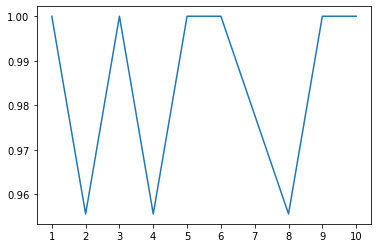

In [16]:
a_index = list(range(1,11))
a = pd.Series() # empty series to store accuracy values

# performing KNN algorithm for differnt values of n
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
    
plt.plot(a_index, a)
x= list(range(1,11))
plt.xticks(x)


The above is the graph the accuracy for the KNN models using different values of n.

## Now we will not use all features. We will use petals and sepals features separately.

In [17]:
# Creating petals and sepals Training Data
petal = iris[['petal_length', 'petal_width', 'species']]
sepal = iris[['sepal_length', 'sepal_width', 'species']]

In [18]:
petal.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [39]:
# Petals Train test split 

train_p, test_p = train_test_split(petal, test_size=0.3,random_state=0)

train_p_X = train_p[['petal_width', 'petal_length']]
train_p_y = train_p['species']

test_p_X = test_p[['petal_length', 'petal_width']]
test_p_y = test_p['species']

In [40]:
train_p.head()

,petal_length,petal_width,species
60,3.5,1.0,versicolor
116,5.5,1.8,virginica
144,5.7,2.5,virginica
119,5.0,1.5,virginica
108,5.8,1.8,virginica


In [41]:
test_p.head()

,petal_length,petal_width,species
114,5.1,2.4,virginica
62,4.0,1.0,versicolor
33,1.4,0.2,setosa
107,6.3,1.8,virginica
7,1.5,0.2,setosa


In [42]:
sepal.head()

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


In [43]:
# Sepals Train test split 

train_s, test_s = train_test_split(sepal, test_size=0.3, random_state=0)

train_s_X = train_s[['sepal_width', 'sepal_length']]
train_s_y = train_s['species']

test_s_X = test_s[['sepal_length', 'sepal_width']]
test_s_y = test_s['species']

In [44]:
train_s.head()

,sepal_length,sepal_width,species
60,5.0,2.0,versicolor
116,6.5,3.0,virginica
144,6.7,3.3,virginica
119,6.0,2.2,virginica
108,6.7,2.5,virginica


In [45]:
test_s.head()

,sepal_length,sepal_width,species
114,5.8,2.8,virginica
62,6.0,2.2,versicolor
33,5.5,4.2,setosa
107,7.3,2.9,virginica
7,5.0,3.4,setosa


## SVM Algorithm:

In [46]:
#performing SVM alogrithm on petal training dataset

model = svm.SVC()
model.fit(train_p_X, train_p_y)
prediction = model.predict(test_p_X)
print('The Accuracy of SVM-petals is:', metrics.accuracy_score(prediction, test_p_y))

# performing SVM algorithm on sepal training dataset

model = svm.SVC()
model.fit(train_s_X, train_s_y)
prediction=model.predict(test_s_X)
print('The Accuracy of SVM-sepals is:', metrics.accuracy_score(prediction, test_s_y))



The Accuracy of SVM-petals is: 0.8222222222222222
The Accuracy of SVM-sepals is: 0.35555555555555557


## Logistic Regression Algorithm:

In [47]:
#performing Logistic Regression alogrithm on petal training dataset

model = LogisticRegression()
model.fit(train_p_X, train_p_y)
prediction = model.predict(test_p_X)
print('The Accuracy of Logistic Regression-petals is:', metrics.accuracy_score(prediction, test_p_y))

# performing Logistic algorithm on sepal training dataset

model = LogisticRegression()
model.fit(train_s_X, train_s_y)
prediction=model.predict(test_s_X)
print('The Accuracy of Logistic Regression-sepals is:', metrics.accuracy_score(prediction, test_s_y))

The Accuracy of Logistic Regression-petals is: 0.5333333333333333
The Accuracy of Logistic Regression-sepals is: 0.35555555555555557


## Decision Tree :

In [48]:
#performing Decision Tree alogrithm on petal training dataset

model = DecisionTreeClassifier()
model.fit(train_p_X, train_p_y)
prediction = model.predict(test_p_X)
print('The Accuracy of Decision Tree-petals is:', metrics.accuracy_score(prediction, test_p_y))

# performing Decision Tree algorithm on sepal training dataset

model = DecisionTreeClassifier()
model.fit(train_s_X, train_s_y)
prediction=model.predict(test_s_X)
print('The Accuracy of Decision Tree-sepals is:', metrics.accuracy_score(prediction, test_s_y))

The Accuracy of Decision Tree-petals is: 0.4
The Accuracy of Decision Tree-sepals is: 0.35555555555555557


# Observations:  
1) When all the features were considered for the ML algorithms- the accuracy was very high.     
2) With sepals and petals features the accuracy is way less as compared to earlier results.  
3) Among sepals and petals features the petals shows better accuracy.